In [1]:
# pip install opencv-python

In [9]:
pip install scikit-learn

In [10]:
import cv2
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from google.colab import drive
drive.mount('/content/drive')

!ls "/content/drive/My Drive"

# !fusermount -u /content/drive
# !rm -rf /content/drive

Mounted at /content/drive
'10-Nguyễn Công Thành.mkv'			   HTML
'2402_Buoi03_ThanhNC(Tren_Lop).sql'		   Java
 Android2.drawio				   K16_Testing11_nhom10
 Android.drawio					  'K16_Testing11_nhom10 (1)'
 ArtStoreProject.rar				  'Kiem thu'
 Bài-tập-thuyết-trình-về-khu-vực.pptx		  'LeagueClient Logs.rar'
 BBKH_TruongCongManh.docx			   Maven
 BCKH_TruongCongManh.docx			   NgoaiNgu
'Biểu đồ ca sử dụng.gdoc'			  'Nguyễn Công Thành.pdf'
'BTL Học máy'					  'Nhóm 14 TTCSN'
 BTL_N1_HocMay_final.docx			   Presentation4.pptx
'Buổi 1 - Giới thiệu HP gửi SV.pptx'		  'Professional statement exemplar.gdoc'
'Chương 1_2 MỘT SỐ GỢI Ý ĐỂ HỌC TỐT (1).gslides'  'Professional statement outline.gdoc'
'Chương 1_2 MỘT SỐ GỢI Ý ĐỂ HỌC TỐT (2).gslides'   Python
'Chương 1_2 MỘT SỐ GỢI Ý ĐỂ HỌC TỐT.gslides'	   Python.drawio
'Chương 2 Cơ bản về MT - CNTT (1).gslides'	   SQL
'Chương 2 Cơ bản về MT - CNTT (2).gslides'	  'Tên ca

In [4]:
image_path = "drive/MyDrive/Colab Notebooks/YOLO/output_video/images/player_1.jpg"
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# plt.imshow(image)

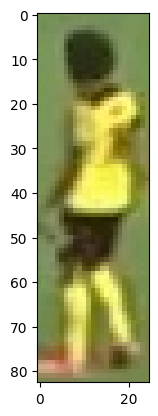

In [5]:
plt.imshow(image)
plt.show()

Take the top half of the image

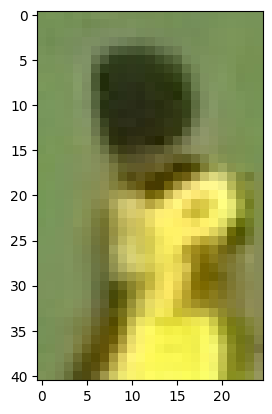

In [6]:
top_half_image = image[0: int(image.shape[0]//2), :]
plt.imshow(top_half_image)
plt.show()

Cluster the image into two cluster

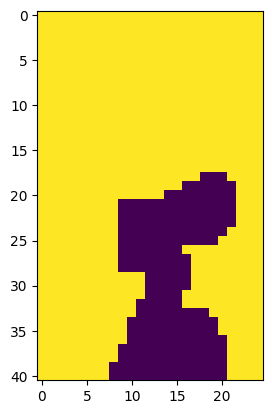

In [12]:
# Reshape the image into 2d array
image_2d = top_half_image.reshape(-1, 3)

# perform k-means clustering with 2
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(image_2d)

# get the cluster labels
labels = kmeans.labels_

# reshape the labels into the orginal image shape
cluster_labels = labels.reshape(top_half_image.shape[0], top_half_image.shape[1])

# Display the clustered image
plt.imshow(cluster_labels)
plt.show()

In [13]:
corner_cluster = [cluster_labels[0, 0], cluster_labels[0, -1], cluster_labels[-1, 0], cluster_labels[-1, -1]]
non_player_cluster = max(set(corner_cluster), key=corner_cluster.count)

print(non_player_cluster)

1


In [14]:
player_cluster = 1 - non_player_cluster
print(player_cluster)

0


In [15]:
kmeans.cluster_centers_[player_cluster]

array([229.64761905, 220.12857143,  91.42380952])